### GAN Implementation 
Dr. XXX Book, YYY

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

In [4]:
#Model Input Dimensions

img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels) #Input Image Dimensions
z_dim = 100 #Size of the noise vector, used as input to the generator

In [7]:
#Building the Generator Model

def build_generator(img_shape, z_dim):
    
    model = Sequential()
    
    model.add(Dense(128, input_dim=z_dim)) #Fully connected layer
    
    model.add(LeakyReLU(alpha=0.01)) #Leaky Relu activation function
    
    model.add(Dense(28 * 28 * 1, activation='tanh')) #Output Layer with tanh as activation function
    
    model.add(Reshape(img_shape)) #Reshapes the Generator output to image dimensions
    
    return model

In [8]:
#Building the Discriminator Model

def build_discriminator(img_shape):
    
    model = Sequential() 
    
    model.add(Flatten(input_shape=img_shape)) #Flattening the input image
   
    model.add(Dense(128)) #Fully connected layer
    
    model.add(LeakyReLU(alpha=0.01)) #Leaky Relu activation function
    
    model.add(Dense(1, activation='sigmoid')) #Ouput layer with sigmoid as activation function
    
    return model

In [11]:
#Building the GAN

def build_gan(generator, discriminator):
    
    model = Sequential()
    
    model.add(generator)
    #Combining the Generator and Discriminator Model
    model.add(discriminator)
    
    return model

discriminator = build_discriminator(img_shape) #Building and Compiling the Discriminator
discriminator.compile(loss='binary_crossentropy',
                        optimizer=Adam(),
                        metrics=['accuracy'])

generator = build_generator(img_shape, z_dim) #Building the Generator

discriminator.trainable = False #Keeping the Discriminator parameters constant for generator training
 
gan = build_gan(generator, discriminator) #Builds and Compiles GAN model with fixed Discriminator to train the Generator
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [13]:
#GAN Metrics

losses = []
accuracies = []
iteration_checkpoints = []

In [19]:
#Training Algorithm

discriminator_loss = []
generator_loss = []

def train(iterations, batch_size, sample_interval):
    
    (X_train, _), (_, _) = mnist.load_data() #Loading the Data Set
    X_train = X_train / 127.5 - 1.0 #Rescaling [0, 255] grayscale pixel values to [-1, 1]
    
    X_train = np.expand_dims(X_train, axis=3) 
    
    real = np.ones((batch_size, 1)) #Labeling all real images to equal 1
    fake = np.zeros((batch_size, 1)) #Labeling all fake images to equal 0

    for iteration in range(iterations):

        idx = np.random.randint(0, X_train.shape[0], batch_size) #Getting a random batch of real images
        imgs = X_train[idx]

        z = np.random.normal(0, 1, (batch_size, 100)) #Getting a random batch of fake images
        gen_imgs = generator.predict(z)

        d_loss_real = discriminator.train_on_batch(imgs, real) #Training the Discriminator
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        discriminator_loss.append(d_loss);

        z = np.random.normal(0, 1, (batch_size, 100)) #Generate a batch of fake images
        gen_imgs = generator.predict(z)
        
        g_loss = gan.train_on_batch(z, real) #Training the Generator
        generator_loss.append(g_loss)

        if (iteration + 1) % sample_interval == 0: #Saving the losses and accuracies for plotting
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)


            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
            (iteration + 1, d_loss, 100.0 * accuracy, g_loss))
            sample_images(generator)

In [15]:
#Displaying Generated Images

def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim)) #Sample of Random Noise
    
    gen_imgs = generator.predict(z) #Generate images from the random noise
    gen_imgs = 0.5 * gen_imgs + 0.5 #Rescaling image pixel values to [0,1]
    
    fig, axs = plt.subplots(image_grid_rows,
                        image_grid_columns, #Setting the image grid
                        figsize=(4, 4),
                        sharey=True,
                        sharex=True)
    
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray') #Outputting a grid of images
            axs[i, j].axis('off')
            cnt += 1

In [23]:
#Hyerparameters

iterations = 20000
batch_size = 128
sample_interval = 1000

1000 [D loss: 0.604556, acc.: 70.31%] [G loss: 1.845765]
2000 [D loss: 0.353637, acc.: 84.77%] [G loss: 2.397685]
3000 [D loss: 0.425100, acc.: 80.08%] [G loss: 2.232306]
4000 [D loss: 0.365002, acc.: 85.16%] [G loss: 2.253877]
5000 [D loss: 0.451409, acc.: 78.91%] [G loss: 2.252159]
6000 [D loss: 0.379366, acc.: 83.98%] [G loss: 1.970393]
7000 [D loss: 0.446534, acc.: 78.91%] [G loss: 2.494464]
8000 [D loss: 0.370116, acc.: 83.59%] [G loss: 2.528702]
9000 [D loss: 0.394361, acc.: 82.42%] [G loss: 2.152191]
10000 [D loss: 0.403959, acc.: 82.03%] [G loss: 2.212908]
11000 [D loss: 0.413186, acc.: 82.81%] [G loss: 2.483592]
12000 [D loss: 0.406504, acc.: 83.20%] [G loss: 2.380105]
13000 [D loss: 0.432683, acc.: 82.81%] [G loss: 1.840977]
14000 [D loss: 0.364908, acc.: 82.42%] [G loss: 2.185067]
15000 [D loss: 0.319015, acc.: 85.94%] [G loss: 2.667350]
16000 [D loss: 0.427159, acc.: 80.08%] [G loss: 2.359216]
17000 [D loss: 0.388276, acc.: 81.64%] [G loss: 2.478763]
18000 [D loss: 0.389396

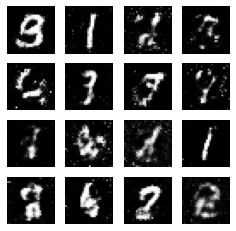

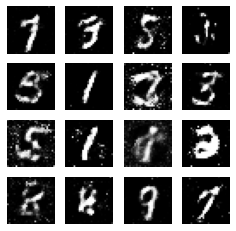

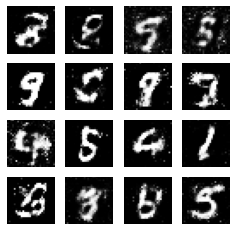

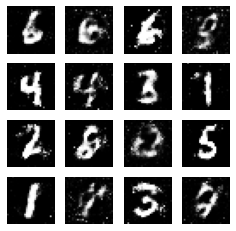

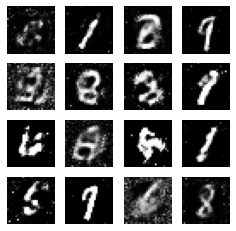

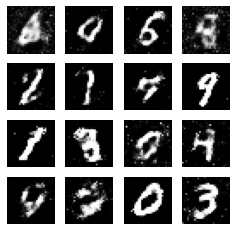

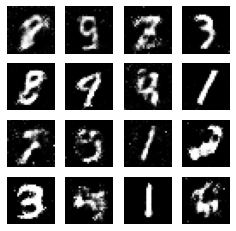

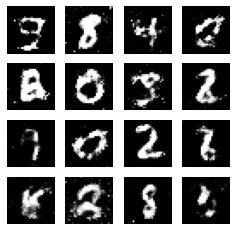

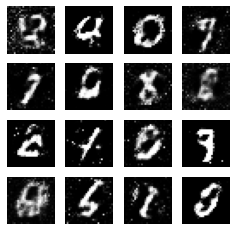

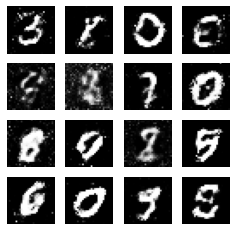

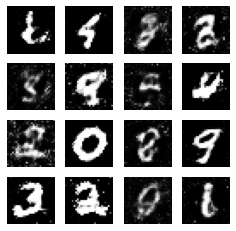

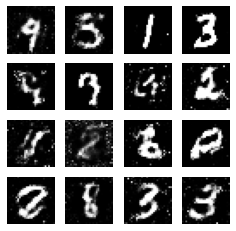

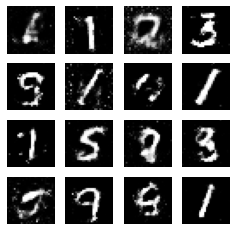

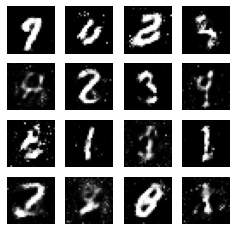

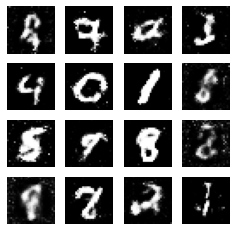

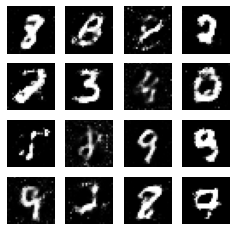

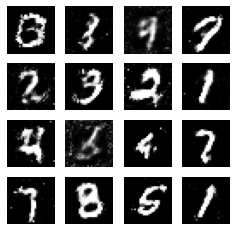

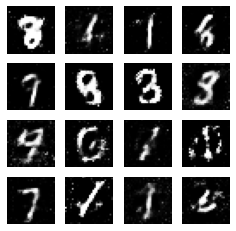

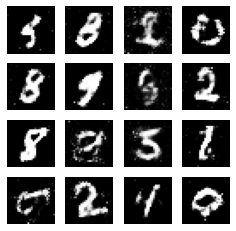

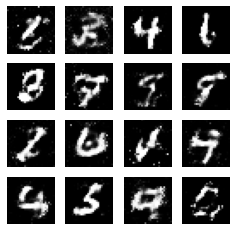

In [24]:
train(iterations, batch_size, sample_interval)

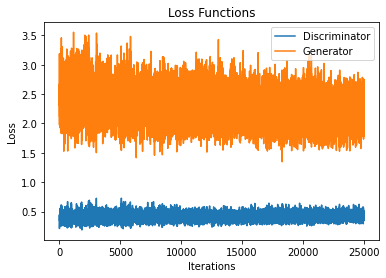

In [25]:
plt.title("Loss Functions")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(discriminator_loss, label = "Discriminator")
plt.plot(generator_loss, label = "Generator")
plt.legend(loc='best')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1bea75a1-e8fd-42f2-ba0f-b9b6de2fd090' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>